### Machine Learning Regression Module - Standard ML Project Steps

This module covers Regression and the standard steps needed to implement an ML project. Below are the key steps we follow:

### 1. Data Preparation/Cleaning
This step includes handling missing values and outliers.

**Imputation Methods:**
- **Mean/Median Imputation:** Filling in missing values with either the average (mean) or middle value (median) of that variable
  - Use mean for normally distributed data
  - Use median for skewed data or when outliers are present

- **K-Nearest Neighbors (KNN) Imputation:** A more sophisticated approach that finds similar data points (neighbors) and uses their values to estimate missing values
  - Preserves relationships between variables
  - More accurate than simple mean/median
  - Computationally more expensive

### 2. Data Integration
If multiple related datasets exist, merge them into a single dataset based on common identifiers (keys). This creates a unified dataset for analysis.

### 3. Data Transformation
Converting variables into suitable formats for analysis through feature engineering.

**Common transformations:**
- **One-Hot Encoding:** Converting categorical variables into binary columns (for nominal categories)
- **Label Encoding:** Converting categorical variables into numerical labels (for ordinal categories)
- **Feature Engineering:** Creating new variables that might have better relationships with target variables

### 4. Feature Scaling
Standardizing or normalizing the range of features so they're on a similar scale.

**Why it matters:**
Many algorithms use distance calculations or gradient descent, which are sensitive to feature magnitude. Without scaling, features with larger ranges dominate the model.

**Example:**
- Feature 1: Age (20-80)
- Feature 2: Income (20,000-200,000)
- Income would disproportionately influence the model due to its larger scale

**Common Scaling Techniques:**

### 4.1 Normalization (Min-Max Scaling)
- Scales features to range [0, 1]
- Formula: (x - min) / (max - min)
- **Use when:** You need bounded values and don't have outliers

### 4.2 Standardization (Z-score Normalization)
- Transforms data to mean=0, standard deviation=1
- Formula: (x - mean) / standard deviation
- **Use when:** Data is normally distributed or has outliers (more robust)

### 4.3 Robust Scaling
- Uses median and interquartile range
- Less affected by outliers

**When scaling is needed:**
- Distance-based algorithms: KNN, K-means, SVM
- Gradient descent algorithms: Neural networks, linear/logistic regression
- Algorithms with regularization

**When scaling is NOT needed:**
- Tree-based models: Decision Trees, Random Forests, XGBoost

### 5. Train-Validation-Test Split
Split the dataset into three parts for model building and evaluation:

- **Training set:** 60% - used to train the model
- **Validation set:** 20% - used to tune hyperparameters and prevent overfitting
- **Test set:** 20% - used for final model evaluation (untouched until the end)

2. Machine Learning for Regression - Car price prediction project

In [231]:
import pandas as pd 
import numpy as np 

    2.2 Data preparation
        2.2.1 Loading and overview

In [232]:
df= pd.read_csv('data.csv')
print(df)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

In [233]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


we need to make all column names consistent in such a way that there is no space between the words and the underscore is also consistent for all columns. Also, all making them all either capital or small letter. 

In [234]:
# for example, this works

df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [235]:
# this doesn't work because of space.
# df.Transmission Type

In [236]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [237]:
print(df['make'].dtypes)
print(df['model'].dtypes)
print(df['year'].dtypes)
print(df['engine_fuel_type'].dtypes)
print(df['engine_hp'].dtypes)

# to select only the objects
print(df.dtypes[df.dtypes == 'object'])

# to select only the int
print(df.dtypes[df.dtypes == 'int64'])

object
object
int64
object
float64
make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object
year           int64
highway_mpg    int64
city_mpg       int64
popularity     int64
msrp           int64
dtype: object


In [238]:
# we're interested in "objects", so let's get access to the index of those and convert them to a list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [239]:
# now let's make consistent column names for these objects as well

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()    

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


2.3 Exploratory data analysis (EDA)

### What is EDA?
EDA is exploring your data to understand it better before building models. It's like getting to know your data first!

### Why Do EDA?
- Find patterns and trends
- Understand relationships between variables
- Spot problems in the data
- Make better decisions about next steps

### Three Main Parts of EDA:

#### 1. Summary Statistics
Calculate basic numbers to understand your data:
- **Mean** - average value
- **Median** - middle value
- **Standard deviation** - how spread out the data is

These help you spot outliers and understand data distribution.

#### 2. Visualizations
Create graphs to see patterns visually:
- **Histograms** - show data distribution
- **Scatter plots** - show relationships between two variables
- **Box plots** - show spread and outliers

Visualizations make it easier to spot patterns you might miss in numbers alone.

#### 3. Data Cleaning
Fix problems in your dataset:
- Handle missing values (fill them in or remove them)
- Deal with outliers (unusual values)
- Fix inconsistencies or errors

### Key Point:
EDA is **iterative** - you keep exploring as you learn more about your data. Each discovery may lead to new questions!

### Bottom Line:
EDA is the foundation of any data project. It helps you understand your data before you analyze it or build models.

In [240]:
# EDA on car prediction price dataset
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [241]:
# all unique values from all columns
print("number of all unique values: ", df[col].nunique())

number of all unique values:  6049


In [242]:
# distribution of prize

# For plotting we use two libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to dispaly the  plots in notebooks
%matplotlib inline

12

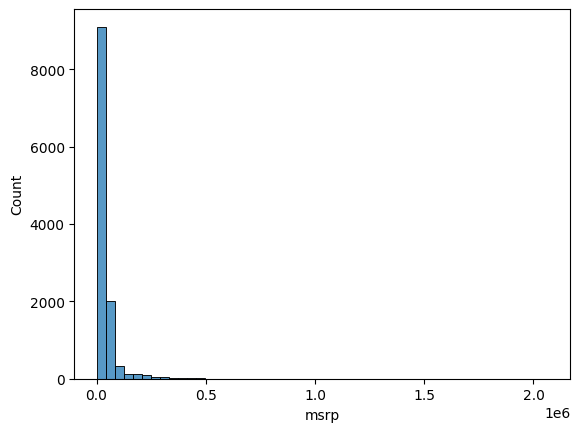

In [243]:
sns.histplot(df.msrp, bins = 50)
10^6
# 1e6 = 10**6 = 1,000,000

 this is a long-tail distribution (many prices in a small range, but a few prices in a wide range). 

In [244]:
10**6

1000000

<Axes: xlabel='msrp', ylabel='Count'>

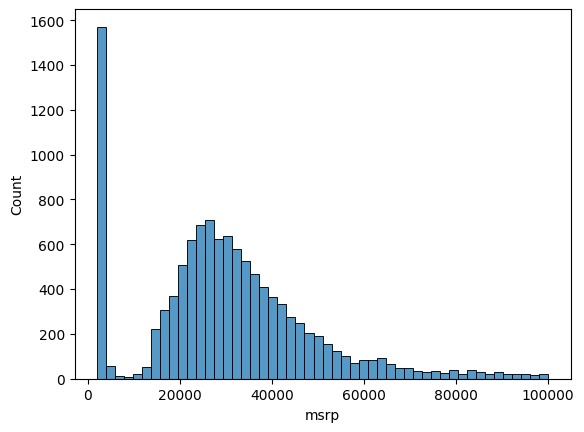

In [245]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

#### Handling Skewed Distributions (Long Tail Problem)

**Problem:** Distributions with long tails and sharp peaks confuse ML models because:
- The data is highly skewed
- Models struggle to learn patterns effectively
- Predictions can be inaccurate

**Solution: Log Transformation**
- Apply logarithm to the variable (e.g., price)
- This compresses the long tail
- Results in more compact, normalized values
- Makes the distribution more suitable for ML models

<Axes: xlabel='msrp', ylabel='Count'>

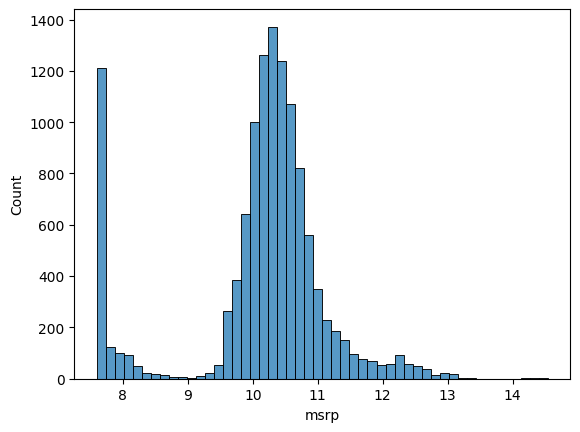

In [246]:
# Transform price column
price_logs = np.log1p(df.msrp)

# Visualize the transformed distribution
sns.histplot(price_logs, bins=50)

In [247]:
# checking missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Setting up the validation framework

Train-Validation-Test Split

 Why Split the Data?
Split the dataset into three parts to properly evaluate model performance:

- **Training set (60%):** Train the model
- **Validation set (20%):** Tune hyperparameters and check performance during development
- **Test set (20%):** Final evaluation only (use rarely, keep untouched!)

### How to Split: Step-by-Step

### *Step 1: Calculate split sizes*

In [248]:


# Get total number of records
n = len(df) 
print("total records are:",n)

# Calculate 20% for validation and test
n_val = n_test = int(n * 0.2)  # Each: 2,382 records

print("total records in validation & test datasets are:",n_val, n_test)

# Remaining 60% for training
n_train = n - n_val - n_test 
print("total records in tarining datasets are:",n_train)

# Verify: should equal total
n_val + n_test + n_train  
print("verify the total equal", n_val + n_test + n_train )

total records are: 11914
total records in validation & test datasets are: 2382 2382
total records in tarining datasets are: 7150
verify the total equal 11914


### *Step 2: Split the dataframe*

In [249]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [250]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [251]:
# .iloc is used to select rows by their position/index number (like selecting items from a list).

# Understanding the Slicing
# Let's use a simple example with 10 rows to make it clear:

# Imagine we have 10 rows total
#n = 10
#n_train = 6   # 60% = 6 rows
#n_val = 2     # 20% = 2 rows  
#n_test = 2    # 20% = 2 rows

# Our dataframe looks like this:
# Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [252]:
# Training set
#df_train = df.iloc[:n_train]
# Same as: df.iloc[:6]
# Means: Take rows from start (0) up to position 6 (NOT including 6)
# Result: Rows 0, 1, 2, 3, 4, 5 (6 rows total)

In [253]:
# validation set
#df_val = df.iloc[n_train:n_train + n_val]
# Same as: df.iloc[6:6+2]
# Same as: df.iloc[6:8]
# Means: Take rows from position 6 up to position 8 (NOT including 8)
# Result: Rows 6, 7 (2 rows total)

In [254]:
# test set
#df_test = df.iloc[n_train + n_val:]
# Same as: df.iloc[6+2:]
# Same as: df.iloc[8:]
# Means: Take rows from position 8 to the end
# Result: Rows 8, 9 (2 rows total)

### *Step 3: Shuffle the indexes*

But the data is sequnetial. This issue arises when there in an order in the dataset. But this data can be shuffeled by shuffling the index of he datasets.

In [255]:
idx = np.arange(n)
idx
#np.random.seed(2)
np.random.shuffle(idx)
idx

array([5551, 7760, 6792, ..., 6612, 7721, 6848], shape=(11914,))

In [256]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [257]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5551,maserati,granturismo_convertible,2016,premium_unleaded_(required),454.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,150465
7760,audi,q3,2017,premium_unleaded_(recommended),200.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,28,20,3105,36600
6792,mercedes-benz,metris,2016,premium_unleaded_(recommended),208.0,4.0,automatic,rear_wheel_drive,4.0,luxury,compact,passenger_minivan,23,20,617,32500
10366,buick,terraza,2005,regular_unleaded,200.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,passenger_minivan,21,15,155,30990
4984,nissan,frontier,2016,regular_unleaded,261.0,6.0,automatic,rear_wheel_drive,4.0,NaN,compact,crew_cab_pickup,22,16,2009,25680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,infiniti,fx35,2009,premium_unleaded_(required),303.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,23,16,190,42150
2249,toyota,camry,2015,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,35,25,2031,23840
5772,lexus,hs_250h,2012,regular_unleaded,187.0,4.0,automatic,front_wheel_drive,4.0,"luxury,hybrid",midsize,sedan,34,35,454,39800
10773,chevrolet,trax,2016,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,24,1385,24145


### *Step 4: drop the old index column*

In [258]:
#reset index and drop the old index column.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [259]:
#apply the log1p transformation to the price column to help the model perform well
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### *Step 5: Remove the prediction column from the df_train, df_val, df_test*
Very important step here is that we need to remove the msrp values from the dataframes because we don't want to use it for training purposes.

In [260]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [261]:
len(y_train)

7150

### 2.5 Linear regression

What is Linear Regression?

* Statistical technique for predicting continuous numerical outcomes
* Finds the best-fitting linear relationship between input features and output
* Used across economics, finance, engineering, and social sciences

How It Works

* Minimizes the sum of squared errors between predicted and actual values
* Uses "ordinary least squares" method to find the best-fitting line
* Goal: find coefficient values that give the most accurate predictions

Single Observation Example

For one car (engine_hp, city_mpg, popularity):
xi = [138, 24, 1385] 

Function: 
g(xi) = w0 + w1xi1 + w2xi2+ w3xi3

With weights :
w0 = 7.17, w = [0.01, 0.04, 0.002]

Calculation: 
7.17 + (138 * 0.01) + (24 * 0.04) + (1385 * 0.002) = 12.28

Interpreting the Weights

w₀ = 7.17 → Base price prediction without any features
engine_hp × 0.01 → Price increases $1 per 100 horsepower
city_mpg × 0.04 → Higher fuel consumption = higher price
popularity × 0.002 → Small impact on price per social media mention

*Linear regression provides a simple, interpretable way to predict numbers and understand feature relationships*

In [262]:
df_train.iloc[10]

make                                     volkswagen
model                            beetle_convertible
year                                           2014
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     210.0
engine_cylinders                                4.0
transmission_type                            manual
driven_wheels                     front_wheel_drive
number_of_doors                                 2.0
market_category                         performance
vehicle_size                                compact
vehicle_style                           convertible
highway_mpg                                      31
city_mpg                                         23
popularity                                      873
Name: 10, dtype: object

In [263]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [264]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [265]:
linear_regression(xi)

12.312

### 2.6 Training a linear regression model

#### The Goal

Find the weight vector w that makes predictions as close as possible to actual values
We want: Xw = y (predictions equal actual values)

#### The Math Problem
#### Understanding Matrix Inverses

    Inverse (X⁻¹) is like "division" for matrices
    When you multiply a matrix by its inverse: X × X⁻¹ = I (Identity matrix)
    Similar to how 5 × 1/5 = 1 in regular math

#### What is a Square Matrix?

A matrix where number of rows = number of columns
Examples:

2×2 matrix ✓ (square)
3×3 matrix ✓ (square)
1000×3 matrix ✗ (NOT square - 1000 rows, 3 columns)

#### Why X⁻¹ Doesn't Work for Our Data

    X⁻¹ only exists for square matrices
    Our feature matrix X is usually m × (n+1) - NOT square

    m = number of observations (e.g., 1000 cars)
    n+1 = number of features (e.g., 3 features)
    Example: 1000 rows × 3 columns

Non-square matrices change dimensions → can't be reversed/inverted
It's mathematically impossible to create X⁻¹ for rectangular matrices

#### Understanding the Gram Matrix Solution
Step-by-Step Explanation
Step 1: What is Xᵀ (X Transpose)?

Transpose means flipping rows and columns
If X has dimensions 1000×3 (1000 rows, 3 columns)
Then Xᵀ has dimensions 3×1000 (3 rows, 1000 columns)
Think of it like rotating the matrix 90 degrees

Original X (3×2):          Xᵀ Transposed (2×3):
[1  2]                     [1  3  5]
[3  4]          →          [2  4  6]
[5  6]

Step 2: What Happens When We Multiply XᵀX?

XᵀX = (3×1000) × (1000×3)
Matrix multiplication rule: (a×b) × (b×c) = (a×c)
Result: 3×3 matrix (SQUARE! ✓)

Why This Works:

The middle dimensions (1000) must match for multiplication
The outer dimensions (3 and 3) become the result's dimensions
We always get a square matrix!

General Pattern:

If X is m×n (any rectangular matrix)
Then Xᵀ is n×m
XᵀX is (n×m) × (m×n) = n×n (always square!)
Numerical Example
X (4 cars × 2 features):
[10  5]
[20  8]
[15  6]
[25  9]

Xᵀ (2 features × 4 cars):
[10  20  15  25]
[5   8   6   9]

XᵀX (2×2 - SQUARE!):
[10  20  15  25]   [10  5]     [1550  1015]
[5   8   6   9]  × [20  8]  =  [1015   686]
                   [15  6]
                   [25  9]

                   Why This Solves Our Problem

Original problem: Can't invert X (not square)
New approach: Invert XᵀX instead (IS square!)
(XᵀX)⁻¹ exists because XᵀX is square
This gives us the formula: w = (XᵀX)⁻¹Xᵀy

Key Insight
XᵀX is called the Gram Matrix, and it's ALWAYS square no matter what shape X is!
This mathematical trick lets us "work around" the limitation that we can't invert non-square matrices.

#### The Formula to Find Weights
*w = (XᵀX)⁻¹Xᵀy*

#### Implementation Steps
Step 1: Prepare the Feature Matrix
Why Add a Column of Ones?

Remember the formula: y = w₀ + w₁x₁ + w₂x₂ + ...
w₀ is the bias term (base prediction)
To include w₀ in matrix multiplication, we need a column of 1's
When we multiply: 1 × w₀ = w₀ (keeps the bias in our equation)

Code Breakdown:
Original X (3 cars, 2 features):
``X = [[138, 24],
     [132, 25],
     [158, 24]]
``
#### Create ones vector - same length as number of rows
````ones = np.ones(X.shape[0])  # X.shape[0] = 3 rows
 Result: [1., 1., 1.]````

 Stack ones as first column
``X = np.column_stack([ones, X])
Result: [[1, 138, 24],
          [1, 132, 25],
          [1, 158, 24]]``
What X.shape[0] means:

X.shape returns dimensions as (rows, columns)
X.shape[0] = number of rows (observations)
Example: if X is 1000×3, then X.shape[0] = 1000


Step 2: Calculate the Gram Matrix
What .T and .dot() mean:
pythonXTX = X.T.dot(X)

X.T = transpose of X (flip rows/columns)
.dot() = matrix multiplication
X.T.dot(X) = XᵀX (Gram Matrix)

Example:
``If X is (3×3):
X = [[1, 138, 24],
     [1, 132, 25],
     [1, 158, 24]]
``
 X.T is (3×3):
``X.T = [[1,   1,   1],
       [138, 132, 158],
       [24,  25,  24]]
``
XTX is (3×3) - SQUARE!
XTX = X.T.dot(X)

Step 3: Find the Inverse
What is np.linalg.inv()?

linalg = linear algebra module in NumPy
.inv() = calculates the inverse of a matrix
Finds (XᵀX)⁻¹

Verification:
XTX_inv = np.linalg.inv(XTX)

Check: XTX × XTX_inv should equal Identity matrix
result = XTX.dot(XTX_inv)
Should be:
 ``[[1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]``

Step 4: Compute Full Weight Vector
Breaking Down the Formula:
``w_full = XTX_inv.dot(X.T).dot(y)
This implements: w = (XᵀX)⁻¹Xᵀy``

Step-by-step:

``X.T = transpose X
XTX_inv.dot(X.T) = multiply inverse by Xᵀ
.dot(y) = multiply result by y (target values)``

What is w_full?

A vector containing ALL weights including bias
``Example: [30009.25, -22.78, -257.69, -2.30]
First element = w₀ (bias)
Rest = w₁, w₂, w₃, ... (feature weights)
``

Step 5: Extract Components
``Array Slicing in Python:
w_full = [30009.25, -22.78, -257.69, -2.30]

w0 = w_full[0]      # Get first element
Result: 30009.25

w = w_full[1:]      # Get everything after first element
 Result: [-22.78, -257.69, -2.30]
What [1:] means:

[0] = first element (index 0)
[1:] = from index 1 to the end (everything except first)
[:] = all elements
[:3] = first 3 elements``


Complete Function Walkthrough
````def train_linear_regression(X, y):

    # Step 1: Add column of ones
    ones = np.ones(X.shape[0])        # Create [1, 1, 1, ...]
    X = np.column_stack([ones, X])    # Add as first column
    
    # Step 2: Calculate Gram Matrix
    XTX = X.T.dot(X)                  # XᵀX
    
    # Step 3: Find inverse
    XTX_inv = np.linalg.inv(XTX)      # (XᵀX)⁻¹
    
    # Step 4: Calculate weights
    w_full = XTX_inv.dot(X.T).dot(y)  # (XᵀX)⁻¹Xᵀy
    
    # Step 5: Split into bias and weights
    return w_full[0], w_full[1:]      # (w₀, [w₁, w₂, ...])````


````Usage Example:
X = [[138, 24], [132, 25], [158, 24]]
y = [10000, 20000, 15000]

w0, w = train_linear_regression(X, y)
Returns: w0 = 30009.25
          w = [-22.78, -257.69]

Visual Summary
Input:
X = [[138, 24],      y = [10000,
     [132, 25],           20000,
     [158, 24]]           15000]

↓ Add ones column

X = [[1, 138, 24],
     [1, 132, 25],
     [1, 158, 24]]

↓ Calculate XᵀX and inverse

↓ Apply formula: w = (XᵀX)⁻¹Xᵀy

Output:
w_full = [30009.25, -22.78, -257.69]
         ↓         ↓
         w₀        w (feature weights)````


*2.7 applying linear regression on example data*

In [266]:
def train_linear_regression(X, y):
    pass

In [267]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [268]:
# Step 1: Create Ones Vector
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [269]:
# Step 2: Add Ones Column to X
X = np.column_stack([ones, X])

In [270]:
# Step 3: Define Target Values
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [271]:
# Step 4: Calculate Weights
XTX = X.T.dot(X)                  # Gram Matrix
XTX_inv = np.linalg.inv(XTX)      # Inverse
w_full = XTX_inv.dot(X.T).dot(y)  # Full weight vector

In [272]:
# Step 5: Extract Bias and Weights
pythonw0 = w_full[0]
w = w_full[1:]

print(w0, w)

7.17 [ -16.08906468 -199.47254894   -1.22802883]


In [273]:
# Complete Function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [274]:
import numpy as np

# Define the function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# Create FRESH data (no ones column)
X = np.array([
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
])

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

# Call function
w0, w = train_linear_regression(X, y)
print(f"Bias (w0): {w0}")
print(f"Weights (w): {w}")

Bias (w0): 25844.754055766833
Weights (w): [ -16.08906468 -199.47254894   -1.22802883]


### *2.8 Car price baseline model*

What is a Baseline Model?

* A simple starting point for machine learning
* Uses basic features to make predictions
* Helps us understand if our model is learning anything useful
* We can compare more complex models against this baseline

In [275]:
# Step 1: Exploring Available Features
df_train.columns

# All available features in our dataset

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

What This Shows:

* We have 15 different features about each car
* Some are numerical (engine_hp, year, mpg)
* Some are categorical (make, model, vehicle_style)

In [276]:
# Step 2: Selecting Baseline Features

base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

Why These 5 Features?
Chosen Features:

* engine_hp - Engine horsepower (more power = higher price)
* engine_cylinders - Number of cylinders (4, 6, 8, etc.)
* highway_mpg - Miles per gallon on highway (fuel efficiency)
* city_mpg - Miles per gallon in city
* popularity - How popular the car is (social media mentions)

Why Only These?

* All are numerical (easy to use in linear regression)
* No missing values issues (or we can easily fill them)
* Represent important car characteristics
* Simple enough for a baseline model

In [277]:
# Step 3: Preparing Training Data

X_train = df_train[base].fillna(0).values

Breaking This Down:
 df_train[base]

* Selects only the 5 features we want from the training dataframe
* Creates a smaller dataframe with just these columns

.fillna(0)

* Handles missing values (NaN = "Not a Number")
* Replaces any missing values with 0
* Example: If a car's engine_hp is missing, it becomes 0

Why fill with 0?

* Linear regression can't handle missing values
* 0 is a reasonable default (means "no information")
* Better alternatives exist, but this is simple for baseline

.values

* Converts the dataframe to a NumPy array
* Required format for our train_linear_regression() function
* Removes column names, keeps only the numbers

In [278]:
# Step 4: Training the Model

w0, w = train_linear_regression(X_train, y_train)


What Happens:

* Function calculates optimal weights using our formula: w = (XᵀX)⁻¹Xᵀy
* Returns w0 (bias) and w (feature weights)
* These weights tell us how each feature affects the price

In [279]:
print(w0)  
print(w)   

7.42980074597285
[ 9.32431852e-03 -1.16577815e-01  4.59301601e-02 -9.55808545e-03
 -6.03124775e-06]


In [280]:
# Step 6: Making Predictions

y_pred = w0 + X_train.dot(w)

In [281]:
# In Matrix Form:
X_train.dot(w)  # Multiplies each feature by its weight and sums

array([4.09353075, 2.4747082 , 2.33465769, ..., 2.50169057, 2.00653233,
       1.75646534], shape=(7150,))

<Axes: ylabel='Count'>

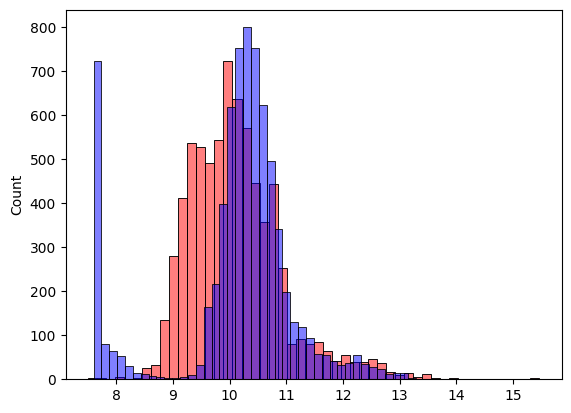

In [282]:
# Step 7: Visualizing Results
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### *2.9 RMSE*

2.9 RMSE (Root Mean Squared Error)
💡 Concept:

RMSE is a metric used to measure how well a regression model predicts outcomes.

It tells us how far our predictions (y_pred) are from the true values (y) on average.

Lower RMSE = better model performance.


In [283]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2   # Step 1: Calculate squared errors
    mse = se.mean()          # Step 2: Compute mean squared error (average of squared errors)
    return np.sqrt(mse)      # Step 3: Take square root to get RMSE


In [284]:
rmse_val =rmse(y_train, y_pred)

print(rmse_val)

0.7468138985982006


Interpretation:

RMSE = 0.7554

This means on average, our predictions differ from the true values by about 0.76 units.

This is on the training data, so it tells how well our model fits the training set.

### *2.10 Validating the Model*

💡 Purpose:

* After training, we must check how well the model performs on unseen data (validation set).

* This helps detect overfitting — when a model works well on training data but fails on new data.

In [285]:
#Step 1 — Prepare Input Data

def prepare_X(df):
    df_num = df[base]          # Select only numerical columns (base features)
    df_num = df_num.fillna(0)  # Replace missing values with 0
    X = df_num.values          # Convert dataframe to NumPy array
    return X


# 🔍 Why?

# ML models need numeric input (arrays).

# Missing values (NaN) can cause errors — filling them ensures stable computation.

In [286]:
# Step 2 — Prepare Training Data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# w0: intercept (bias term)

# w: weight vector (coefficients for features)

In [287]:
# Step 3 — Prepare Validation Data
X_val = prepare_X(df_val)

In [288]:
# Step 4 — Make Predictions
y_pred = w0 + X_val.dot(w)

In [289]:
# Step 5 — Evaluate with RMSE
val = rmse(y_val, y_pred)
print(val)

0.8106890741802982


In [290]:
X_train = prepare_X(df_train)
w0, w   = train_linear_regression(X_train, y_train)

# Train preds
y_pred_train = w0 + X_train.dot(w)

X_val  = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

print("train RMSE:", rmse(y_train, y_pred_train))
print("val   RMSE:", rmse(y_val,   y_pred_val))


train RMSE: 0.7468138985982006
val   RMSE: 0.8106890741802982


### *2.11 Simple Feature Engineering*

Feature engineering means creating new, more informative features from the existing data to help the model make better predictions.

In [ ]:
# Adding a new feature called age (how old something is)
# Re-training our model with this extra feature
# Re-evaluating performance

# Step 1 — Modify prepare_X() to add a new feature
def prepare_X(df):
    df = df.copy()                       # Make a copy to avoid modifying original data
    
    df['age'] = 2017 - df['year']        # Create a new column 'age'
    features = base + ['age']            # Add 'age' to the list of features
    
    df_num = df[features]                # Select numerical features
    df_num = df_num.fillna(0)            # Replace missing values with 0
    X = df_num.values                    # Convert to NumPy array for training

    return X


In [294]:
# Step 2 — Train the Model Again
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [295]:
# Step 3 — Validate on New Data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5350519489714102)

This shows ‘age’ is a strong predictive feature — it helps the model understand how value decreases over time.

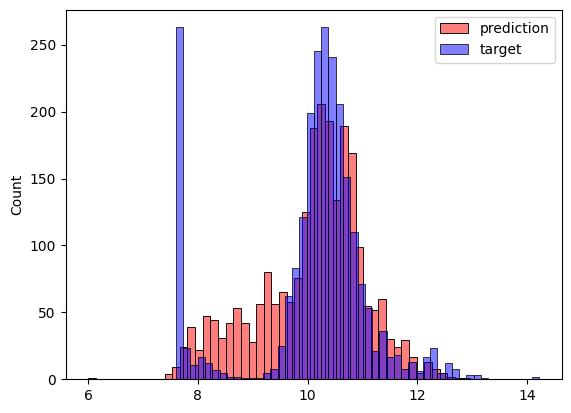

In [296]:
# Step 4 — Visualizing Predictions
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)
plt.legend()


### 2.12 Handling Categorical Variables

So far, our model only used numerical features (like year, mileage, age, etc.).

However, real-world data often includes categorical features — like car make, model, or engine_fuel_type.
These are text-based columns that describe categories rather than numbers.

ML models cannot directly handle text, so we need to convert them into numeric form.

This process is called encoding.

In [297]:
# Step 1 — Identify Categorical Columns
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style']

In [298]:
# Step 2 — Select the Most Frequent Categories
categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)


In [303]:
# Step 3 — Update prepare_X() to Include Categorical and Numeric Features & Encode the Top Categorical Values 

def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [304]:
# Step 4 — Train and Evaluate the Model
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)



np.float64(97.61268738576149)

such large rmse values indicates overfitting. We solve this issue by using regularisation.


### 2.13 Regularization

In [312]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]
X = np.array(X)
y = [1, 2, 3, 1, 2, 3]

# Columns 2 and 3 are almost identical (notice 5 and 5.00000001).

# This causes multicollinearity, meaning the columns are highly correlated.
# The matrix becomes nearly singular (non-invertible).


In [313]:
XTX = X.T.dot(X)
XTX
# This gives  the covariance between features.
# If two columns are almost the same, their covariance values will be large and the matrix nearly singular.

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [317]:
XTX = X.T.dot(X)
XTX = XTX + 0.01 * np.eye(XTX.shape[0])  # add small term to diagonal
XTX_inv = np.linalg.inv(XTX)


In [318]:
XTX_inv.dot(X.T).dot(y)

array([0.33643484, 0.04007035, 0.04007161])

In [319]:
np.linalg.inv(XTX)

array([[ 3.85624712e-02, -1.98159300e-02, -1.98158861e-02],
       [-1.98159300e-02,  5.00124975e+01, -4.99875026e+01],
       [-1.98158861e-02, -4.99875026e+01,  5.00124974e+01]])

In [320]:
XTX = XTX + 0.01 * np.eye(3)

In [321]:
np.linalg.inv(XTX)

array([[ 3.85397609e-02, -1.98033322e-02, -1.98033103e-02],
       [-1.98033322e-02,  2.50124904e+01, -2.49875096e+01],
       [-1.98033103e-02, -2.49875096e+01,  2.50124903e+01]])

In [322]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [323]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5424816261704184)